data from: https://data.world/crowdflower/sentiment-analysis-in-text/

In [44]:
import numpy as np
import pandas as pd
import keras
import tensorflow
from livelossplot import PlotLossesKeras

tensorflow.random.set_seed(0)

In [27]:
df = pd.read_csv('text_emotion.csv')

In [28]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [29]:
df.isna().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

In [30]:
df.shape

(40000, 4)

y

In [31]:
#X = df['content']
y = df['sentiment']

In [32]:
y

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: object

In [33]:
unique, counts = np.unique(y, return_counts=True)

vals = dict(zip(unique, counts))

vals

{'anger': np.int64(110),
 'boredom': np.int64(179),
 'empty': np.int64(827),
 'enthusiasm': np.int64(759),
 'fun': np.int64(1776),
 'happiness': np.int64(5209),
 'hate': np.int64(1323),
 'love': np.int64(3842),
 'neutral': np.int64(8638),
 'relief': np.int64(1526),
 'sadness': np.int64(5165),
 'surprise': np.int64(2187),
 'worry': np.int64(8459)}

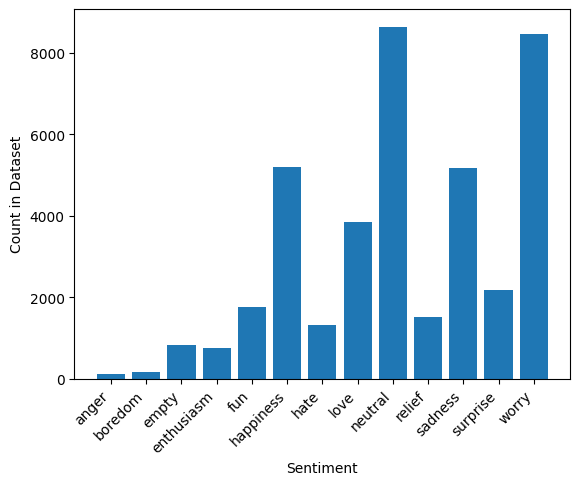

In [192]:
import matplotlib.pyplot as plt


plt.bar(*zip(*vals.items()))
plt.xlabel('Sentiment')
plt.ylabel('Count in Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()

Data is very skewed towards 'neutral' and 'worry' and skewed away from 'anger' and 'boredom'. Overall very skewed.

In [35]:
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [36]:
y = pd.get_dummies(y)


In [37]:
y

,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
0,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,False,False,False,False,False,False,False,False,True,False,False,False,False
39996,False,False,False,False,False,False,False,True,False,False,False,False,False
39997,False,False,False,False,False,False,False,True,False,False,False,False,False
39998,False,False,False,False,False,True,False,False,False,False,False,False,False


In [38]:
X

array([[   0,    0,    0, ...,   24,  184,  560],
       [   0,    0,    0, ...,   14,   42,  292],
       [   0,    0,    0, ..., 4220, 1766,  236],
       ...,
       [   0,    0,    0, ...,    9,   42,   21],
       [   0,    0,    0, ...,   10,    3,  454],
       [   0,    0,    0, ...,  325, 1012, 1245]], dtype=int32)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()

vec_array = vec.fit_transform(df['content'].values.astype('U'))

n_words = vec_array.shape[1]
n_words

48212

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=n_words)
tokenizer.fit_on_texts(df['content'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['content'])

maxlen = 0

for seq in sequences:
    if len(seq) > maxlen:
        maxlen = len(seq)
print("Max Len: ",maxlen)
X = pad_sequences(sequences, maxlen=maxlen)

Max Len:  37


In [219]:
X

array([[   0,    0,    0, ...,   14,   43,  295],
       [   0,    0,    0, ..., 4087, 1704,  244],
       [   0,    0,    0, ...,   36,   53,   59],
       ...,
       [   0,    0,    0, ...,    9,   43,   21],
       [   0,    0,    0, ...,   10,    3,  466],
       [   0,    0,    0, ...,  332, 1011, 1229]], dtype=int32)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

pare your dataset.
Calculate:
Vocabulary size
Maximum sequence length
Divide your dataset into training and test set.
70% training set
30% testing set


Define an RNN with the following layers:
The input layer is an embedding layer with the following parameters:
The input dimension is the vocabulary size.
The output dimension is 10.
The input length is the maximum sequence length.
An LSTM layer with 128 units.
An LSTM layer with 64 units.
A fully connected layer with:
100 units
Activation function: relu
A dropout layer with 0.5 rate.
The output layer is a fully connected layer with:
5 units
Activation function: Softmax


Build the network using the following parameters:
Optimizer: Adam
Loss function: categorical_crossentropy
Metrics: accuracy
Batch size: 256
Epochs: 10

Use Keras to implement the network described and train your data.
Classification metrics:
Print the accuracy measure on the testing data.



In [55]:
y

,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
0,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,False,False,False,False,False,False,False,False,True,False,False,False,False
39996,False,False,False,False,False,False,False,True,False,False,False,False,False
39997,False,False,False,False,False,False,False,True,False,False,False,False,False
39998,False,False,False,False,False,True,False,False,False,False,False,False,False


In [52]:
tf.keras.backend.clear_session(
    free_memory=True
)

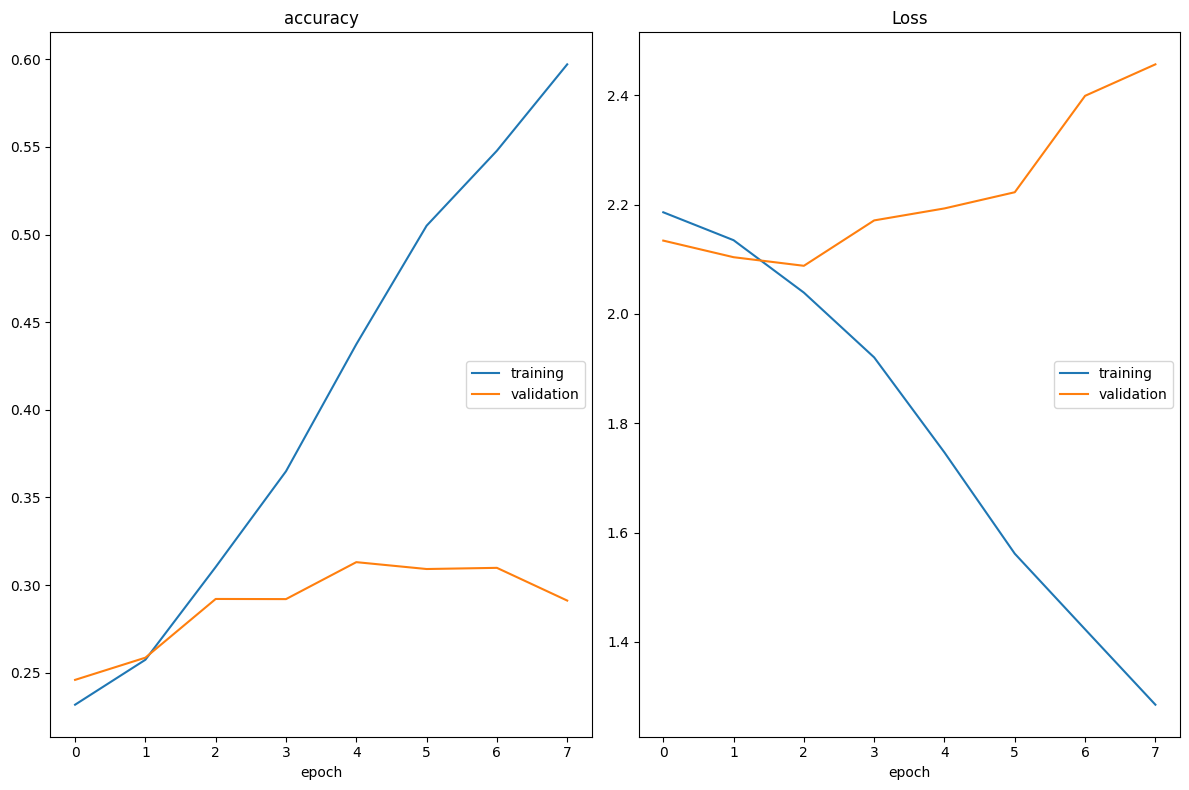

accuracy
	training         	 (min:    0.232, max:    0.597, cur:    0.597)
	validation       	 (min:    0.246, max:    0.313, cur:    0.291)
Loss
	training         	 (min:    1.285, max:    2.186, cur:    1.285)
	validation       	 (min:    2.088, max:    2.457, cur:    2.457)
110/110 ━━━━━━━━━━━━━━━━━━━━ 38s 343ms/step - accuracy: 0.5813 - loss: 1.3305 - val_accuracy: 0.2912 - val_loss: 2.4568
Epoch 8: early stopping
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2897 - loss: 2.4562
Final Test Accuracy: 0.2912


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam



model = Sequential()


model.add(Embedding(input_dim=n_words, output_dim=10))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(units=13, activation='softmax'))

optimizer = Adam()

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=5,
        verbose=1,
        mode='auto'
    ),
    PlotLossesKeras()
]

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=256, epochs=10, 
          validation_data =(X_test,y_test),
          callbacks=[PlotLossesKeras(),callbacks])

loss, accuracy = model.evaluate(X_test,y_test)

print(f"Final Test Accuracy: {accuracy:.4f}")



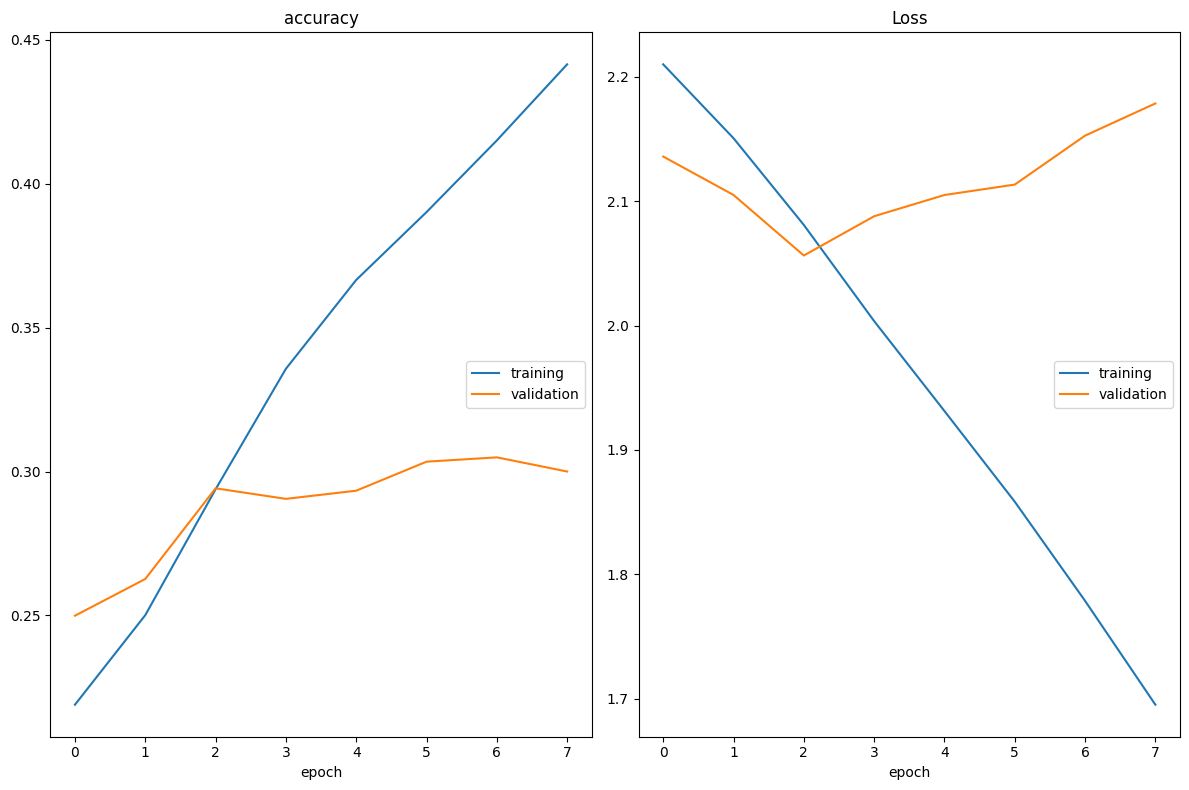

accuracy
	training         	 (min:    0.219, max:    0.441, cur:    0.441)
	validation       	 (min:    0.250, max:    0.305, cur:    0.300)
Loss
	training         	 (min:    1.695, max:    2.210, cur:    1.695)
	validation       	 (min:    2.056, max:    2.178, cur:    2.178)
110/110 ━━━━━━━━━━━━━━━━━━━━ 64s 584ms/step - accuracy: 0.4316 - loss: 1.7278 - val_accuracy: 0.3000 - val_loss: 2.1784
Epoch 8: early stopping
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.3012 - loss: 2.1634
Final Test Accuracy: 0.3000


In [63]:
# Adding more dropout to hopefully help overfitting 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

dropout_rate = 0.4

model = Sequential()


model.add(Embedding(input_dim=n_words, output_dim=10))
model.add(LSTM(units=128, return_sequences=True, dropout=dropout_rate))
model.add(LSTM(units=64, dropout=dropout_rate))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=13, activation='softmax'))

optimizer = Adam()

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=5,
        verbose=1,
        mode='auto'
    ),
    PlotLossesKeras()
]

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=256, epochs=10, 
          validation_data =(X_test,y_test),
          callbacks=[PlotLossesKeras(),callbacks])

loss, accuracy = model.evaluate(X_test,y_test)

print(f"Final Test Accuracy: {accuracy:.4f}")


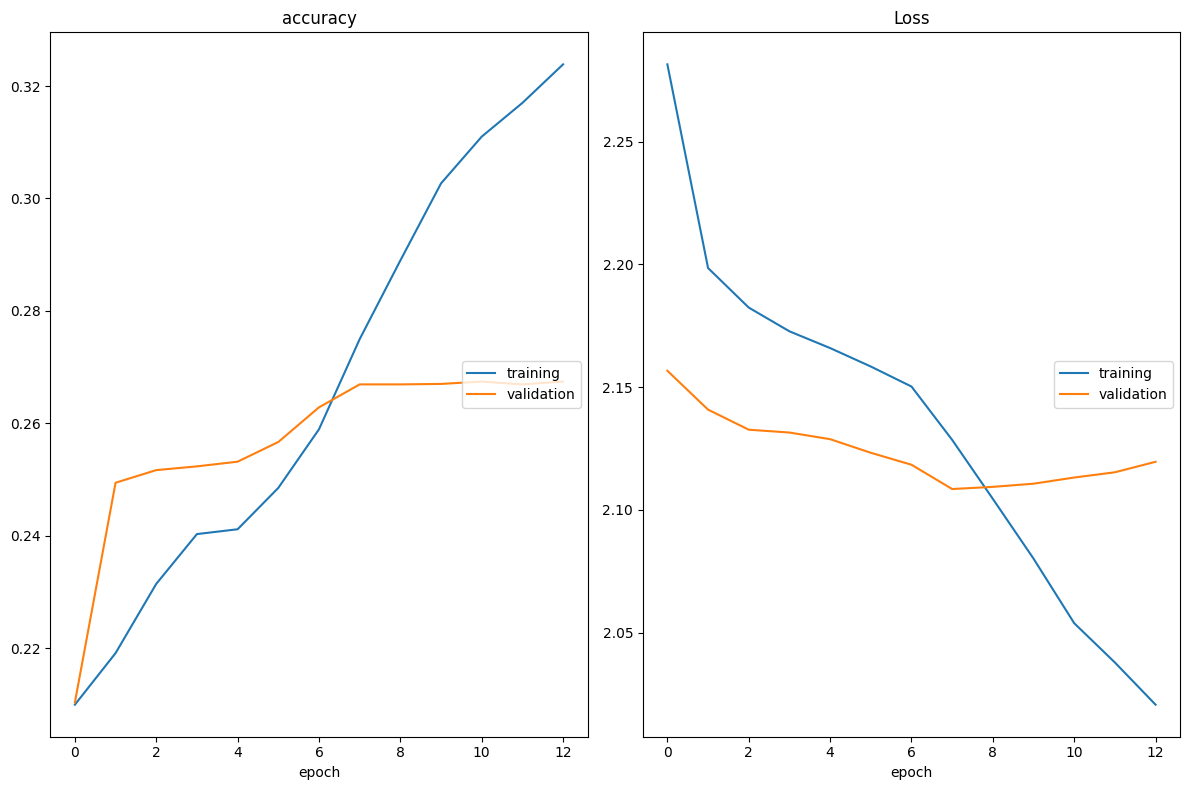

accuracy
	training         	 (min:    0.210, max:    0.324, cur:    0.324)
	validation       	 (min:    0.210, max:    0.267, cur:    0.267)
Loss
	training         	 (min:    2.021, max:    2.282, cur:    2.021)
	validation       	 (min:    2.109, max:    2.157, cur:    2.120)
438/438 ━━━━━━━━━━━━━━━━━━━━ 64s 147ms/step - accuracy: 0.3201 - loss: 2.0318 - val_accuracy: 0.2674 - val_loss: 2.1196
Epoch 13: early stopping
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2667 - loss: 2.1118
Final Test Accuracy: 0.2674


In [62]:
# Reducing batch size and learning rate

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

dropout_rate = 0.5

model = Sequential()


model.add(Embedding(input_dim=n_words, output_dim=10))
model.add(LSTM(units=128, return_sequences=True, dropout=dropout_rate))
model.add(LSTM(units=64, dropout=dropout_rate))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=13, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=5,
        verbose=1,
        mode='auto'
    ),
    PlotLossesKeras()
]

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=64, epochs=30, 
          validation_data =(X_test,y_test),
          callbacks=[PlotLossesKeras(),callbacks])

loss, accuracy = model.evaluate(X_test,y_test)

print(f"Final Test Accuracy: {accuracy:.4f}")


The models struggle to reach validation accuracy beyond around 0.32. This is not great and is likely a combination of a issue with data imballance across classes as we saw above, and limited data (with the 0.7/0.3 split, we are only training on 28k rows).

In [64]:
# Function allowing user to enter there own str to 

def try_model(model, input_str):

    sequence = tokenizer.texts_to_sequences(input_str)
    padded_sequence = pad_sequences(sequence, maxlen=maxlen, padding='pre')
    #pred = model.predict(padded_sequence.reshape(1,-1))
    pred = model.predict(padded_sequence.reshape(1,-1), batch_size=1)
    #print(pred)
    pred_i = np.argmax(pred)
    sentiment = y.columns[pred_i]
    return sentiment


In [65]:
#pred = try_model(model,'i love it here, everything is so nice')
pred = try_model(model,"i hate peas i hate everything about them, i dislike the way they are")
pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'neutral'

Clearly the above statement is not neutral but knowing that the neutral class is the most frequent shows how the imbalance if the data is confusing the model. 